In [71]:
# loading recquired libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import ast
import seaborn as sns 

# evironment configuration
np.set_printoptions(linewidth=2000)
np.set_printoptions(threshold=2000)


In [72]:
# data reading
data_file_path = "./tmdb-box-office-prediction/train.csv"
dataset = pd.read_csv(data_file_path)

In [73]:
# print basic informations obout dataset
print("Dataset size:", dataset.size)
print("Dataset shape:", dataset.shape)
print("")
print(dataset.info())
print("")
print("Example records: ")
dataset.head(2) #uncomment to see example record

Dataset size: 69000
Dataset shape: (3000, 23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime  

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


# Dataset basic description

In [74]:
# decription of numerical column
dataset.describe(include = [np.number])

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [75]:
# description of objectvalue columns
dataset.describe(include = ['O']) 

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,604,2993,946,3000,3000,3000,2992,2999,2844,2945,3000,2980,3000,2403,3000,2724,2987,2984
unique,422,872,941,3000,36,2975,2992,2999,2383,321,2398,401,2,2400,2969,2648,2975,2984
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2555958,en,Red Dawn,A tale of friendship between two unlikely pen ...,/z5soADAb2n0CDDCQh7Dftn3LCNA.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The One and Only,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe44d29251416c9101dfaf', 'de..."
freq,16,266,4,1,2575,2,1,1,51,1752,5,1817,2996,3,2,27,13,1


In [76]:
# all column description
dataset.describe(include='all') 

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2555958,en,Red Dawn,A tale of friendship between two unlikely pen ...,NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The One and Only,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe44d29251416c9101dfaf', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [77]:
# missing values 
dataset.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

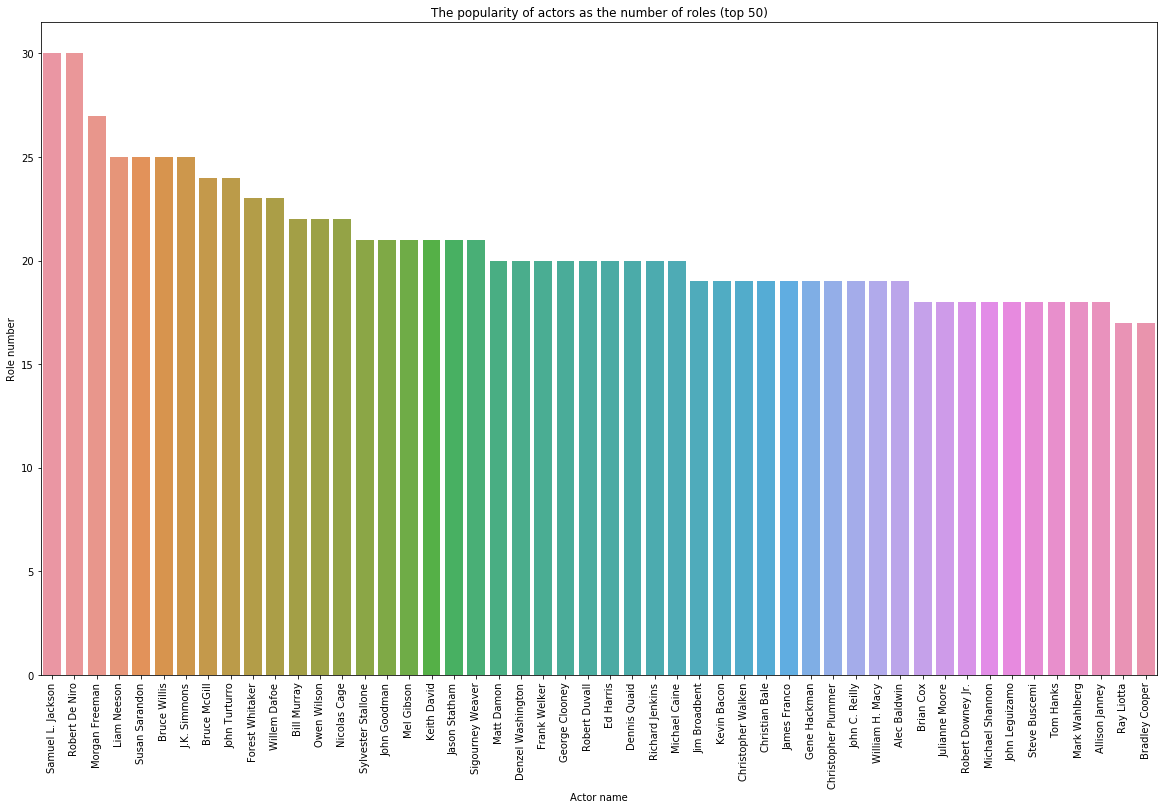

In [78]:
# popularity of an actor expressed as number of films
n = 50
actorMovieDataset = dataset[['id','cast']].copy()
actorMovieDataset['cast'] = actorMovieDataset['cast'].apply(lambda x: {} if pd.isna(x) else [x.get('name') for x in ast.literal_eval(x)])
actorMovieDataset = actorMovieDataset.explode('cast').reset_index(drop=True)
actorMovieDataset = actorMovieDataset.groupby(['cast']).size().reset_index(name='count').sort_values('count', ascending=False)
plt.figure(figsize=(20,12))
sns.barplot(actorMovieDataset['cast'].head(n), actorMovieDataset['count'].head(n))
plt.title("The popularity of actors as the number of roles (top {0})".format(n))
plt.xlabel("Actor name")
plt.ylabel("Role number")
plt.xticks(rotation=90)
plt.show()

In [79]:
# number of actors with concrette role number
actorMovieDataset = dataset[['id','cast']].copy()
actorMovieDataset['cast'] = actorMovieDataset['cast'].apply(lambda x: {} if pd.isna(x) else [x.get('name') for x in ast.literal_eval(x)])
actorMovieDataset = actorMovieDataset.explode('cast').reset_index(drop=True)
actorMovieDataset = actorMovieDataset.groupby(['cast']).size().reset_index(name='count').sort_values('count', ascending=False)
print("Actors number: ", actorMovieDataset.shape[0])
actorMovieDataset.head(10)
# plt.figure(figsize=(20,12))
# sns.barplot(actorMovieDataset['cast'], actorMovieDataset['count'])
# plt.title("The popularity of actors as the number of roles")
# plt.xlabel("Actor name")
# plt.ylabel("Role number")
# plt.xticks(rotation=90)
# plt.show()

Actors number:  38588


,cast,count
32323,Samuel L. Jackson,30
30927,Robert De Niro,30
26518,Morgan Freeman,27
22119,Liam Neeson,25
34668,Susan Sarandon,25
4858,Bruce Willis,25
14988,J.K. Simmons,25
4836,Bruce McGill,24
18327,John Turturro,24
11728,Forest Whitaker,23


In [80]:
# Source: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

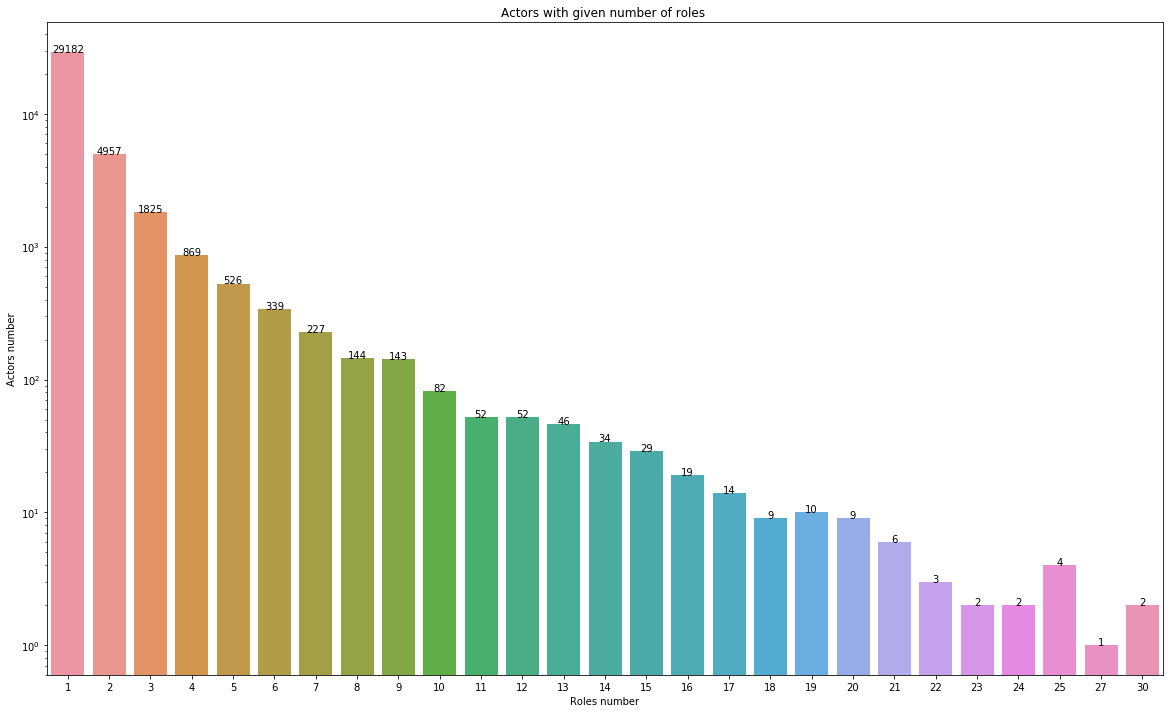

In [81]:
actorMovieRolesDataset = actorMovieDataset.groupby(['count']).size().reset_index(name='actors_with_given_role_number')
actorMovieRolesDataset.head(10)
plt.figure(figsize=(20,12))
x = actorMovieRolesDataset['count']
y = actorMovieRolesDataset['actors_with_given_role_number']
# snbp = sns.barplot(x='actors_with_given_role_number',y='count',data=actorMovieRolesDataset,orient="h")
# show_values_on_bars(snbp, "h", 0.5)
snbp = sns.barplot(x='count',y='actors_with_given_role_number',data=actorMovieRolesDataset)
show_values_on_bars(snbp, "v", 0.5)
snbp.set_yscale('log')
plt.title("Actors with given number of roles ")
plt.xlabel("Roles number")
plt.ylabel("Actors number")
plt.show()

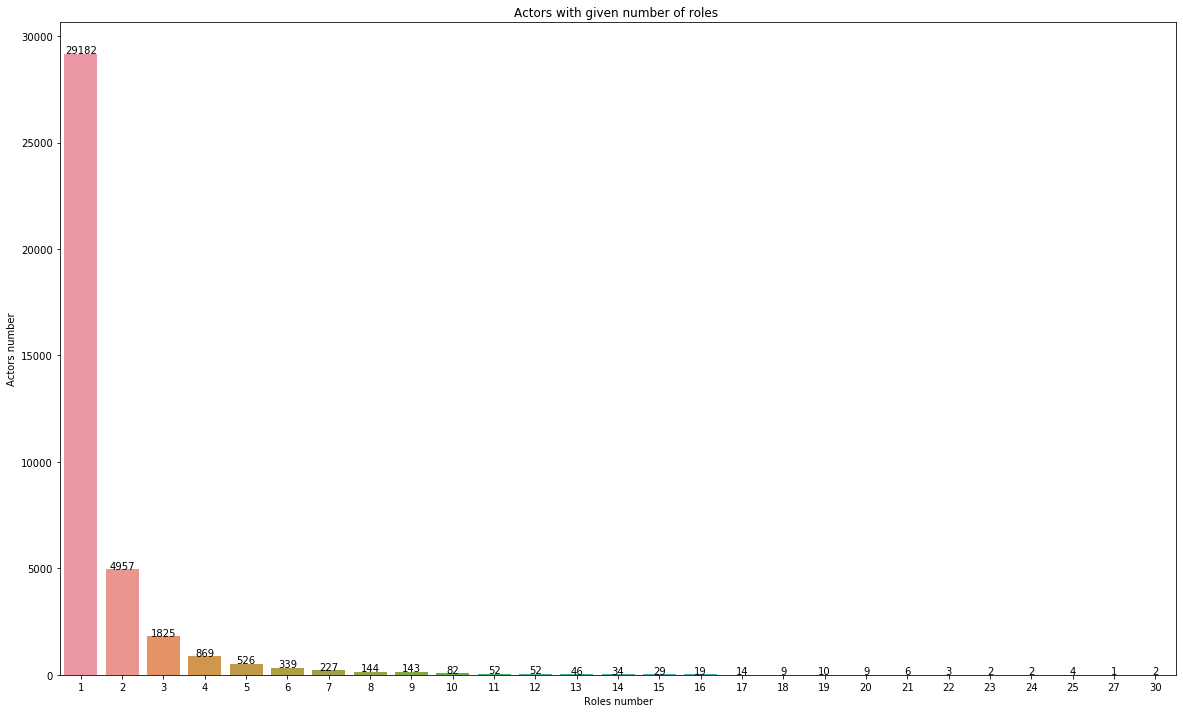

In [82]:
actorMovieRolesDataset = actorMovieDataset.groupby(['count']).size().reset_index(name='actors_with_given_role_number')
actorMovieRolesDataset.head(10)
plt.figure(figsize=(20,12))
x = actorMovieRolesDataset['count']
y = actorMovieRolesDataset['actors_with_given_role_number']
# snbp = sns.barplot(x='actors_with_given_role_number',y='count',data=actorMovieRolesDataset,orient="h")
# show_values_on_bars(snbp, "h", 0.5)
snbp = sns.barplot(x='count',y='actors_with_given_role_number',data=actorMovieRolesDataset)
show_values_on_bars(snbp, "v", 0.5)
plt.title("Actors with given number of roles ")
plt.xlabel("Roles number")
plt.ylabel("Actors number")
plt.show()

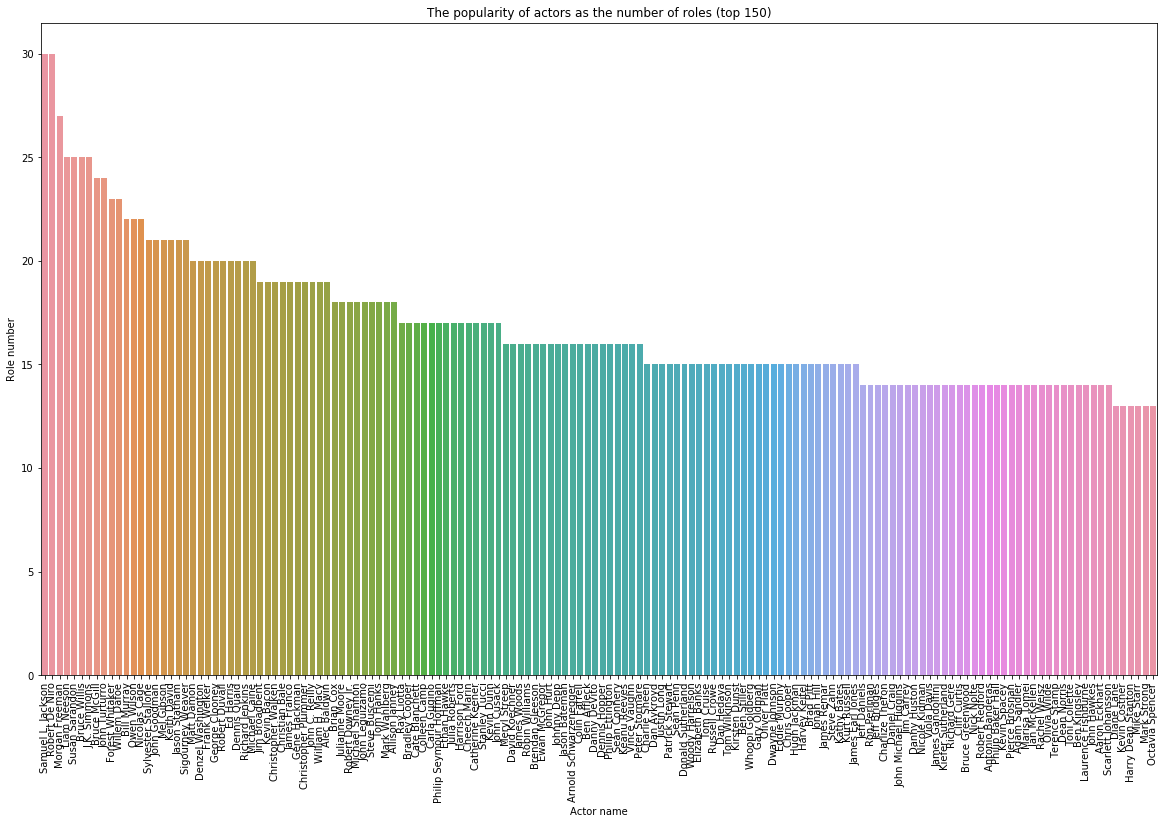

In [83]:
# popularity of an actor expressed as number of films
n = 150
actorMovieDataset = dataset[['id','cast']].copy()
actorMovieDataset['cast'] = actorMovieDataset['cast'].apply(lambda x: {} if pd.isna(x) else [x.get('name') for x in ast.literal_eval(x)])
actorMovieDataset = actorMovieDataset.explode('cast').reset_index(drop=True)
actorMovieDataset = actorMovieDataset.groupby(['cast']).size().reset_index(name='count').sort_values('count', ascending=False)
plt.figure(figsize=(20,12))
sns.barplot(actorMovieDataset['cast'].head(n), actorMovieDataset['count'].head(n))
plt.title("The popularity of actors as the number of roles (top {0})".format(n))
plt.xlabel("Actor name")
plt.ylabel("Role number")
plt.xticks(rotation=90)
plt.show()